## Crawling


In [1]:
import re
import string
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

**Fungsi Crawling**

In [2]:
def crawl(url, num_page):

    result = []
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "lxml")

    # Membuka paging page
    paging = soup.find_all("nav",{'class':'pagination'})
    paging_link = paging[0].find_all('a',{'class':'pagination__page'})
    last_page = num_page

    # looping untuk membuka setip halaman
    for i in range(1,last_page+1):
        print(url+'page/'+str(i))

        # mencari daftar link dari artiker yang ada pada setiap halaman
        req = requests.get(url+'page/'+str(i))
        soup = BeautifulSoup(req.text, "lxml")
        news_links = soup.find_all("div",{'class':'thumb-container thumb-65'})
        # print(news_links)

        # looping membuka artikel setiap halaman

        for idx,news in enumerate(news_links):
            news_dict = {}

            #find news title
            title_news= news.find('h1',{'class':'entry__title'}).text.replace("\n", "").title()


            #find urll news
            url_news = news.find('a',{'class':''}).get('href')


            #find news content in url
            req_news =  requests.get(url_news)
            soup_news = BeautifulSoup(req_news.text, "lxml")

            #find news content
            news_content = soup_news.find("div",{'class':'entry__article-wrap'})

            #find paragraph in news content
            p = news_content.find_all('p')
            content = ' '.join(item .text for item in p)
            news_content = content.encode('utf8','replace')

            #wrap in dictionary
            news_dict['no']=idx+1
            news_dict['url'] = url_news
            news_dict['title'] = title_news
            news_dict['content'] = news_content
            result.append(news_dict)

    return result

In [3]:
def crawl_kuliner(url):
    # mencari daftar link dari artikel yang ada pada setiap halaman
    result = []
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "lxml")
    news_links = soup.find_all("div",{'class':'thumb-container thumb-65'})

    # looping membuka artikel setiap halaman

    for idx,news in enumerate(news_links):
        news_dict = {}

        #find news title
        title_news= news.find('h1',{'class':'entry__title'}).text.replace("\n", "").title()


        #find urll news
        url_news = news.find('a',{'class':''}).get('href')


        #find news content in url
        req_news =  requests.get(url_news)
        soup_news = BeautifulSoup(req_news.text, "lxml")

        #find news content
        news_content = soup_news.find("div",{'class':'entry__article-wrap'})

        #find paragraph in news content
        p = news_content.find_all('p')
        content = ' '.join(item .text for item in p)
        news_content = content.encode('utf8','replace')

        #wrap in dictionary
        news_dict['no']=idx+1
        news_dict['url'] = url_news
        news_dict['title'] = title_news
        news_dict['content'] = news_content
        result.append(news_dict)

    return result

In [4]:
url = 'https://visitjawatengah.jatengprov.go.id/id/filter/kabupaten-semarang/result/kuliner'
kuliner1 = crawl_kuliner(url)
kuliner1 = pd.DataFrame(kuliner1)

In [5]:
url = 'https://visitjawatengah.jatengprov.go.id/id/filter/kota-semarang/result/kuliner'
kuliner2 = crawl_kuliner(url)
kuliner2 = pd.DataFrame(kuliner2)

In [6]:
kuliner = kuliner1.append(kuliner2)

<ipython-input-6-0489f99fa3cb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuliner = kuliner1.append(kuliner2)


In [7]:
url = 'https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/destinasi-wisata/'
wisata1 = crawl(url, 4)
wisata1 = pd.DataFrame(wisata1)

https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/destinasi-wisata/page/1
https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/destinasi-wisata/page/2
https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/destinasi-wisata/page/3
https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/destinasi-wisata/page/4


In [8]:
url = 'https://visitjawatengah.jatengprov.go.id/id/regency/kota-semarang/destinasi-wisata/'
wisata2 = crawl(url, 3)
wisata2 = pd.DataFrame(wisata2)

https://visitjawatengah.jatengprov.go.id/id/regency/kota-semarang/destinasi-wisata/page/1
https://visitjawatengah.jatengprov.go.id/id/regency/kota-semarang/destinasi-wisata/page/2
https://visitjawatengah.jatengprov.go.id/id/regency/kota-semarang/destinasi-wisata/page/3


In [9]:
wisata = wisata1.append(wisata2)

<ipython-input-9-1cc55fac608e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wisata = wisata1.append(wisata2)


In [10]:
crwl = wisata.append(kuliner)

<ipython-input-10-e519402fef01>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crwl = wisata.append(kuliner)


In [11]:
crwl.head(None)

,no,url,title,content
0,1,https://visitjawatengah.jatengprov.go.id/id/re...,Puri Kayana Camping Ground,b'#SobatWisata\xc2\xa0kangen ngecamp nggak nih...
1,2,https://visitjawatengah.jatengprov.go.id/id/re...,Mengunjungi Wisata Religi Nyatnyono,b'Desa Nyatnyono di lereng Gunung Ungaran dike...
2,3,https://visitjawatengah.jatengprov.go.id/id/re...,"Candi Dukuh, Petilasan Prabu Brawijaya","b'Candi Dukuh terletak di Desa Rowoboni, Kecam..."
3,4,https://visitjawatengah.jatengprov.go.id/id/re...,5 Hal Spesial Di Desa Wisata Lerep,b'Jalan-jalan ke Semarang? Mampirlah ke Desa W...
4,5,https://visitjawatengah.jatengprov.go.id/id/re...,All In One In Sunrise Hill Gedong Songo,b'#SobatWisata\xc2\xa0lagi cari referensi rest...
...,...,...,...,...
4,5,https://visitjawatengah.jatengprov.go.id/id/re...,Mi Kopyok,b'adalah jenis makanan yang biasanya dijual di...
5,6,https://visitjawatengah.jatengprov.go.id/id/re...,Tahu Gimbal,b'Racikan tahu gimbal terdiri dari potongan ta...
6,7,https://visitjawatengah.jatengprov.go.id/id/re...,Lumpia,b'Kudapan yang terbuat dari rebung dibungkus d...
7,8,https://visitjawatengah.jatengprov.go.id/id/re...,Wedang Tahu,b'Wedang Tahu adalah sejenis minuman yang bera...


In [12]:
crwl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       87 non-null     int64 
 1   url      87 non-null     object
 2   title    87 non-null     object
 3   content  87 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.4+ KB


**Cleaning Dokumen hasil crwaling**

In [13]:
def documents_cleaning(doc):
  docs_clean = []

  for d in doc:
      html = d.decode("utf-8")                              # Men-decode hasil scrapy dari web yang masih terenkripsi utf-8 dari html
      document_test = re.sub(r'[^\x00-\x7F]+', ' ', html)
      document_test = re.sub(r'#\w+', '', document_test)
      docs_clean.append(document_test)

  return docs_clean

In [14]:
# menghilangkan simbol-simbol, tag, url, dan huruf atau karakter yang tidak digunakan
def case_folding(doc):
      doc = re.sub(r'@\w+', '', doc)
      doc = re.sub("http.+", " ", doc)
      doc = re.sub("www.+", " ", doc)
      doc = re.sub(".+.com$", " ", doc)
      doc = doc.lower()
      doc = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', doc)
      doc = re.sub(r'[0-9]', '', doc)
      doc = re.sub(r"\b[a-zA-Z]\b", "",doc)
      doc = re.sub(r'\s{2,}', ' ', doc)
      doc = doc.replace("html", " ")
      doc = re.sub(r'\s+', ' ', doc)
      return doc


In [15]:
crwl['content'] = documents_cleaning(crwl['content'])

In [16]:
crwl['clean_content'] = (crwl['content']).apply(case_folding)

In [17]:
crwl.head()

,no,url,title,content,clean_content
0,1,https://visitjawatengah.jatengprov.go.id/id/re...,Puri Kayana Camping Ground,kangen ngecamp nggak nih? Cuss berkemah denga...,kangen ngecamp nggak nih cuss berkemah dengan...
1,2,https://visitjawatengah.jatengprov.go.id/id/re...,Mengunjungi Wisata Religi Nyatnyono,Desa Nyatnyono di lereng Gunung Ungaran dikena...,desa nyatnyono di lereng gunung ungaran dikena...
2,3,https://visitjawatengah.jatengprov.go.id/id/re...,"Candi Dukuh, Petilasan Prabu Brawijaya","Candi Dukuh terletak di Desa Rowoboni, Kecamat...",candi dukuh terletak di desa rowoboni kecamata...
3,4,https://visitjawatengah.jatengprov.go.id/id/re...,5 Hal Spesial Di Desa Wisata Lerep,Jalan-jalan ke Semarang? Mampirlah ke Desa Wis...,jalan jalan ke semarang mampirlah ke desa wisa...
4,5,https://visitjawatengah.jatengprov.go.id/id/re...,All In One In Sunrise Hill Gedong Songo,lagi cari referensi resto? Penginapan? Spot s...,lagi cari referensi resto penginapan spot sel...


In [18]:
hasil = crwl[['no','title','content','clean_content','url']]
hasil.to_csv('crawl_wisata.csv', index=False)
hasil.head()

,no,title,content,clean_content,url
0,1,Puri Kayana Camping Ground,kangen ngecamp nggak nih? Cuss berkemah denga...,kangen ngecamp nggak nih cuss berkemah dengan...,https://visitjawatengah.jatengprov.go.id/id/re...
1,2,Mengunjungi Wisata Religi Nyatnyono,Desa Nyatnyono di lereng Gunung Ungaran dikena...,desa nyatnyono di lereng gunung ungaran dikena...,https://visitjawatengah.jatengprov.go.id/id/re...
2,3,"Candi Dukuh, Petilasan Prabu Brawijaya","Candi Dukuh terletak di Desa Rowoboni, Kecamat...",candi dukuh terletak di desa rowoboni kecamata...,https://visitjawatengah.jatengprov.go.id/id/re...
3,4,5 Hal Spesial Di Desa Wisata Lerep,Jalan-jalan ke Semarang? Mampirlah ke Desa Wis...,jalan jalan ke semarang mampirlah ke desa wisa...,https://visitjawatengah.jatengprov.go.id/id/re...
4,5,All In One In Sunrise Hill Gedong Songo,lagi cari referensi resto? Penginapan? Spot s...,lagi cari referensi resto penginapan spot sel...,https://visitjawatengah.jatengprov.go.id/id/re...


# Index

**Membaca crawl_wisata.csv**

In [19]:
df = pd.read_csv('crawl_wisata.csv')
df.head()

,no,title,content,clean_content,url
0,1,Puri Kayana Camping Ground,kangen ngecamp nggak nih? Cuss berkemah denga...,kangen ngecamp nggak nih cuss berkemah dengan...,https://visitjawatengah.jatengprov.go.id/id/re...
1,2,Mengunjungi Wisata Religi Nyatnyono,Desa Nyatnyono di lereng Gunung Ungaran dikena...,desa nyatnyono di lereng gunung ungaran dikena...,https://visitjawatengah.jatengprov.go.id/id/re...
2,3,"Candi Dukuh, Petilasan Prabu Brawijaya","Candi Dukuh terletak di Desa Rowoboni, Kecamat...",candi dukuh terletak di desa rowoboni kecamata...,https://visitjawatengah.jatengprov.go.id/id/re...
3,4,5 Hal Spesial Di Desa Wisata Lerep,Jalan-jalan ke Semarang? Mampirlah ke Desa Wis...,jalan jalan ke semarang mampirlah ke desa wisa...,https://visitjawatengah.jatengprov.go.id/id/re...
4,5,All In One In Sunrise Hill Gedong Songo,lagi cari referensi resto? Penginapan? Spot s...,lagi cari referensi resto penginapan spot sel...,https://visitjawatengah.jatengprov.go.id/id/re...


**Tokenization** memecah kata pada clean_content yang ada menggunakan

In [20]:
df_parse = df.copy()

cols = ["clean_content"]
for col in cols:
  df_parse[col] = df_parse[col].str.split()

df_parse.head()

,no,title,content,clean_content,url
0,1,Puri Kayana Camping Ground,kangen ngecamp nggak nih? Cuss berkemah denga...,"[kangen, ngecamp, nggak, nih, cuss, berkemah, ...",https://visitjawatengah.jatengprov.go.id/id/re...
1,2,Mengunjungi Wisata Religi Nyatnyono,Desa Nyatnyono di lereng Gunung Ungaran dikena...,"[desa, nyatnyono, di, lereng, gunung, ungaran,...",https://visitjawatengah.jatengprov.go.id/id/re...
2,3,"Candi Dukuh, Petilasan Prabu Brawijaya","Candi Dukuh terletak di Desa Rowoboni, Kecamat...","[candi, dukuh, terletak, di, desa, rowoboni, k...",https://visitjawatengah.jatengprov.go.id/id/re...
3,4,5 Hal Spesial Di Desa Wisata Lerep,Jalan-jalan ke Semarang? Mampirlah ke Desa Wis...,"[jalan, jalan, ke, semarang, mampirlah, ke, de...",https://visitjawatengah.jatengprov.go.id/id/re...
4,5,All In One In Sunrise Hill Gedong Songo,lagi cari referensi resto? Penginapan? Spot s...,"[lagi, cari, referensi, resto, penginapan, spo...",https://visitjawatengah.jatengprov.go.id/id/re...


In [21]:
# Memasukkan tokenisasi ke dalam df_doc
df_doc = pd.DataFrame(columns = ["document"])
df_doc["document"] = df_parse['clean_content']

df_doc.head()

,document
0,"[kangen, ngecamp, nggak, nih, cuss, berkemah, ..."
1,"[desa, nyatnyono, di, lereng, gunung, ungaran,..."
2,"[candi, dukuh, terletak, di, desa, rowoboni, k..."
3,"[jalan, jalan, ke, semarang, mampirlah, ke, de..."
4,"[lagi, cari, referensi, resto, penginapan, spo..."


**Menambahkan nilai ID dokumen dari lokasi kata ditemukan berdasarkan letak kata pada dokumen ke-n, n=index**

In [ ]:
df_term = pd.DataFrame(columns = ["Term","DocID"])

size = df_doc.shape[0]
for index in range(size):
    row = df_doc['document'].iloc[index]

    for kata in row:
        df_term = df_term.append({"Term":kata,"DocID":index}, ignore_index=True)

In [59]:
df_term

,Term,DocID
0,kangen,0
1,ngecamp,0
2,nggak,0
3,nih,0
4,cuss,0
...,...,...
5953,beraroma,86
5954,harum,86
5955,gurih,86
5956,dan,86


In [24]:
df_term.shape

(5958, 2)

**Mengurutkan Term berdasar alfabetnya**

In [25]:
df_term_sorted = df_term.sort_values(by="Term")
df_term_sorted.head(10)

,Term,DocID
3092,abad,44
2044,abad,29
3281,abad,47
4403,abad,59
4399,abad,59
144,abad,2
3212,abdul,46
3419,abdul,48
2177,acara,30
2164,acara,30


In [26]:
df_term_sorted.shape

(5958, 2)

## inverted index

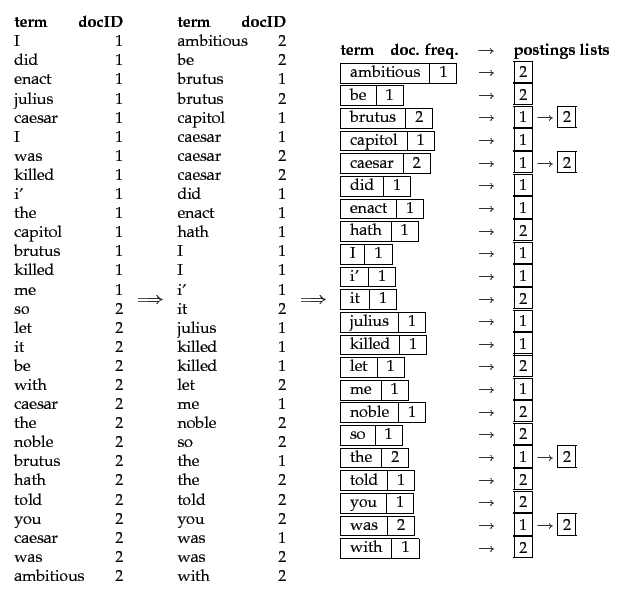

Sumber : https://nlp.stanford.edu/IR-book/html/htmledition/a-first-take-at-building-an-inverted-index-1.html


**Inisialisasi inverted index**

In [27]:
df_invertedindex = pd.DataFrame(columns = ["Terms","docFreq","postList"])
df_invertedindex

,Terms,docFreq,postList


In [28]:
# Memasukkan daftar term yang unique atau menggabungkan term yang sama menjadi 1
size = df_term_sorted.shape[0]
df_invertedindex['Terms'] = df_term_sorted['Term'].unique()

df_invertedindex.head()

,Terms,docFreq,postList
0,abad,NaN,NaN
1,abdul,NaN,NaN
2,acara,NaN,NaN
3,ada,NaN,NaN
4,adalah,NaN,NaN


In [29]:
# inisialisasi nilai
df_invertedindex["docFreq"]=0
df_invertedindex.head()

,Terms,docFreq,postList
0,abad,0,NaN
1,abdul,0,NaN
2,acara,0,NaN
3,ada,0,NaN
4,adalah,0,NaN


In [30]:
df_invertedindex.shape

(1907, 3)

In [31]:
ukuran = df_term_sorted.shape[0]
print(ukuran)
inverted_index_counter = 0
temp_list = []
for i in range(ukuran): # Melakukan looping sebanyak jumlah data berdasarkan ukuran tabel data term
  # Jika term pada df_term_sorted ke i identik dengan terms pada df_invertedindex index ke inverted_index_counter
  # Maka nilai inverted ditambah 1 terus hingga bertemu term yang sama terakhir
  if (df_term_sorted['Term'].iloc[i] == df_invertedindex['Terms'].iloc[inverted_index_counter]):
    df_invertedindex["docFreq"].iloc[inverted_index_counter]+=1
    temp_list.append(df_term_sorted["DocID"].iloc[i])
    df_invertedindex["postList"].iloc[inverted_index_counter] = temp_list

  # Setelah bertemu kata terakhir maka selanjutnya merubah nilai index dari inverted untuk membaca term selanjutnya
  # untuk dilakukan pencocokan dengan data term_sorted
  else :
    temp_list = []
    inverted_index_counter += 1
    df_invertedindex["docFreq"].iloc[inverted_index_counter] += 1
    temp_list.append(df_term_sorted["DocID"].iloc[i])
    df_invertedindex["postList"].iloc[inverted_index_counter] = temp_list


5958


<ipython-input-31-83094e6e0364>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invertedindex["docFreq"].iloc[inverted_index_counter]+=1
<ipython-input-31-83094e6e0364>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invertedindex["postList"].iloc[inverted_index_counter] = temp_list
<ipython-input-31-83094e6e0364>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invertedindex["docFreq"].iloc[inverted_index_counter] += 1
<i

In [32]:
print(df_invertedindex.head(10))

       Terms  docFreq                                           postList
0       abad        6                            [44, 29, 47, 59, 59, 2]
1      abdul        2                                           [46, 48]
2      acara        3                                       [30, 30, 65]
3        ada       16  [28, 4, 36, 56, 10, 11, 70, 63, 69, 68, 14, 6,...
4     adalah       20  [18, 73, 44, 83, 37, 58, 45, 57, 41, 30, 85, 4...
5   adaptasi        1                                               [78]
6       adat        2                                           [58, 58]
7  adrenalin        2                                            [17, 9]
8  advanture        1                                               [34]
9       agak        1                                               [81]


In [33]:
# Export to CSV
df_invertedindex.to_csv("invertedIndex.csv",index=False)

# Kompresi Index

**Membaca Dataset Inverted index**

In [34]:
df = pd.read_csv('invertedIndex.csv')
df.head(None)

,Terms,docFreq,postList
0,abad,6,"[44, 29, 47, 59, 59, 2]"
1,abdul,2,"[46, 48]"
2,acara,3,"[30, 30, 65]"
3,ada,16,"[28, 4, 36, 56, 10, 11, 70, 63, 69, 68, 14, 6,..."
4,adalah,20,"[18, 73, 44, 83, 37, 58, 45, 57, 41, 30, 85, 4..."
...,...,...,...
1902,yunani,2,"[45, 49]"
1903,ziarah,1,[22]
1904,zipcoaster,1,[10]
1905,zona,1,[17]


In [35]:
# Membuat dataframe baru
df_dict = pd.DataFrame(columns = ["Freq","Posting_ptr","Terms_ptr"])

df_dict["Freq"] = df["docFreq"]
df_dict["Posting_ptr"] = df["postList"]

df_dict


,Freq,Posting_ptr,Terms_ptr
0,6,"[44, 29, 47, 59, 59, 2]",NaN
1,2,"[46, 48]",NaN
2,3,"[30, 30, 65]",NaN
3,16,"[28, 4, 36, 56, 10, 11, 70, 63, 69, 68, 14, 6,...",NaN
4,20,"[18, 73, 44, 83, 37, 58, 45, 57, 41, 30, 85, 4...",NaN
...,...,...,...
1902,2,"[45, 49]",NaN
1903,1,[22],NaN
1904,1,[10],NaN
1905,1,[17],NaN


In [36]:
# Membuat term string dan term pointer
term_str = ""
term_counter = 0
for i in range(df_dict.shape[0]):
    term = df["Terms"].iloc[i]
    term_str += term
    df_dict["Terms_ptr"].iloc[i] = term_counter
    term_counter += len(term)


<ipython-input-36-6de116f62162>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict["Terms_ptr"].iloc[i] = term_counter


In [37]:
term_str

'abadabdulacaraadaadalahadaptasiadatadrenalinadvantureagakagamaagendakanagroagungairairnyaajaajakakanakarakhirakhirnyaakibatakomodasiaksesaksesorisaksiaktivitasalaalamalamialasalotalteralternatifamanambarawaananakandandaanekaanggunanginangklungangkutanannaantarantaraantaranyaantikapaapakahapiarabarabikaarangareaarenarenaargoaristokratarkeologiarsitekarsitekstunyaarsitekturartartikelartinyaasalnyaasiaasinasistenasliasmaulaspalasriassumptaasuransiasyikatatapatasatasnyaatauatiatraksiatvavalokitesvaraawalawalnyaayamayoayooayunanbabadanbabatbacabagbagaibagaikanbagaimanabagibagianbahanbahasabahkanbaikbakalbakaubaksobakubakwanbaladewabalemongbalibalokbambubanbanaranbandengbandunganbangetbangsabangunanbanjirbankbantalanbantuanbanyakbanyubanyubirubanyukuningbarangbaratbarengbarongbarouquebarubasahbasahanbatubaturbawahbawangbawenbaxobebatuanbeberapabecakbedabegitubelandabelibeliaubemacambenangbencanabendabendunganbenggalabenihbentangbentukbentuknyaberadaberagamberaniberaromaberarsitekturberartib

In [38]:
df_dict

,Freq,Posting_ptr,Terms_ptr
0,6,"[44, 29, 47, 59, 59, 2]",0
1,2,"[46, 48]",4
2,3,"[30, 30, 65]",9
3,16,"[28, 4, 36, 56, 10, 11, 70, 63, 69, 68, 14, 6,...",14
4,20,"[18, 73, 44, 83, 37, 58, 45, 57, 41, 30, 85, 4...",17
...,...,...,...
1902,2,"[45, 49]",12312
1903,1,[22],12318
1904,1,[10],12324
1905,1,[17],12334


In [39]:
# Export to csv
df_dict.to_csv('compressed_index.csv',index=False)
# Export to txt
term_file = open("term_compress.txt", "w")
term_file.write(term_str)
term_file.close()



#Implementasi Penghitungan Skor

##Import Library

In [40]:
import pandas as pd
import numpy as np

##Membaca dataset

In [41]:
df = pd.read_csv('crawl_wisata.csv')
df.head()

,no,title,content,clean_content,url
0,1,Puri Kayana Camping Ground,kangen ngecamp nggak nih? Cuss berkemah denga...,kangen ngecamp nggak nih cuss berkemah dengan...,https://visitjawatengah.jatengprov.go.id/id/re...
1,2,Mengunjungi Wisata Religi Nyatnyono,Desa Nyatnyono di lereng Gunung Ungaran dikena...,desa nyatnyono di lereng gunung ungaran dikena...,https://visitjawatengah.jatengprov.go.id/id/re...
2,3,"Candi Dukuh, Petilasan Prabu Brawijaya","Candi Dukuh terletak di Desa Rowoboni, Kecamat...",candi dukuh terletak di desa rowoboni kecamata...,https://visitjawatengah.jatengprov.go.id/id/re...
3,4,5 Hal Spesial Di Desa Wisata Lerep,Jalan-jalan ke Semarang? Mampirlah ke Desa Wis...,jalan jalan ke semarang mampirlah ke desa wisa...,https://visitjawatengah.jatengprov.go.id/id/re...
4,5,All In One In Sunrise Hill Gedong Songo,lagi cari referensi resto? Penginapan? Spot s...,lagi cari referensi resto penginapan spot sel...,https://visitjawatengah.jatengprov.go.id/id/re...


In [42]:
data = df[['title', 'clean_content', 'url']]
data.head()

,title,clean_content,url
0,Puri Kayana Camping Ground,kangen ngecamp nggak nih cuss berkemah dengan...,https://visitjawatengah.jatengprov.go.id/id/re...
1,Mengunjungi Wisata Religi Nyatnyono,desa nyatnyono di lereng gunung ungaran dikena...,https://visitjawatengah.jatengprov.go.id/id/re...
2,"Candi Dukuh, Petilasan Prabu Brawijaya",candi dukuh terletak di desa rowoboni kecamata...,https://visitjawatengah.jatengprov.go.id/id/re...
3,5 Hal Spesial Di Desa Wisata Lerep,jalan jalan ke semarang mampirlah ke desa wisa...,https://visitjawatengah.jatengprov.go.id/id/re...
4,All In One In Sunrise Hill Gedong Songo,lagi cari referensi resto penginapan spot sel...,https://visitjawatengah.jatengprov.go.id/id/re...


Pencarian dilakukan berdasarkan kata yang ada pada judul dan isi artikel maka kita akan melakukan pembobotan pada judul dan isi konten, oleh karena itu kita gabungkan data judul dan isi masing-masing artikel

In [43]:
df['data']=df.apply(lambda x:'%s %s' % (x['title'],x['clean_content']),axis=1)
df['data'].head()

0    Puri Kayana Camping Ground   kangen ngecamp ng...
1    Mengunjungi Wisata Religi Nyatnyono  desa nyat...
2    Candi Dukuh, Petilasan Prabu Brawijaya  candi ...
3    5 Hal Spesial Di Desa Wisata Lerep  jalan jala...
4    All In One In Sunrise Hill Gedong Songo   lagi...
Name: data, dtype: object

**Menggunakan Library sklearn.feature_extraction.text**
---
import CountVectorizer untuk menghitung banyaknya term tertentu pada setiap dokumen


In [44]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer()
vects = vect.fit_transform(df['data'])

td = pd.DataFrame(vects.toarray())
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc'+str(i+1) for i in range(td.shape[0])]


In [45]:
term_document_matrix.to_csv('term_document.csv')

In [46]:
term_document_matrix.head()

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc78,Doc79,Doc80,Doc81,Doc82,Doc83,Doc84,Doc85,Doc86,Doc87
abad,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ada,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adalah,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0


**Menggunakan Library sklearn.feature_extraction.text**
---
import TfidfVectorizer untuk menghitung tf-idf setiap term pada setiap dokumen


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['data'])

In [49]:
df = pd.DataFrame(X.T.toarray(), index=vectorizer.get_feature_names_out())
df.head()


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
abad,0.0,0.0,0.081659,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
abdul,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
acara,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
ada,0.0,0.0,0.000000,0.0,0.100839,0.0,0.069816,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
adalah,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.050904,0.0,0.0,0.0,0.0,0.07308,0.065686,0.0,0.092509,0.0


In [50]:
df.to_csv('tfidf.csv')

In [52]:
tfidf = pd.DataFrame(X.T.todense(), index=vectorizer.get_feature_names_out(), columns=['Doc'+str(i+1) for i in range(td.shape[0])])
tfidf

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc78,Doc79,Doc80,Doc81,Doc82,Doc83,Doc84,Doc85,Doc86,Doc87
abad,0.0,0.0,0.081659,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
abdul,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
acara,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
ada,0.0,0.0,0.000000,0.0,0.100839,0.0,0.069816,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
adalah,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.050904,0.0,0.0,0.0,0.0,0.07308,0.065686,0.0,0.092509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yunani,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
ziarah,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
zipcoaster,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0
zona,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0


##Query Processing

In [53]:
import textwrap

In [54]:
wrapper = textwrap.TextWrapper(width=120)

In [55]:
def get_similar_articles(q, df):
  print("Berikut artikel dengan nilai cosine similarity tertinggi: ")
  q = [q] #query
  q_vec = vectorizer.transform(q).toarray().reshape(df.shape[0],)
  sim = {}
  for i in range(len(df.T)):
    sim[i] = np.dot(df.loc[:, i].values, q_vec) / np.linalg.norm(df.loc[:, i]) * np.linalg.norm(q_vec)


  sim_sorted = sorted(sim.items(), key=lambda x: x[1], reverse=True)
  i = 1
  for k, v in sim_sorted:
    if i<=10: #menampilkan 10 teratas hasil perankingan
      print(i,". ", data.title[k], "[", data.index[k], "]")
      print("Nilai Similaritas:", v)
      print(wrapper.fill(data.clean_content[k]))
      print(data.url[k])
      print()
    i+=1

In [56]:
query = ''

In [57]:

get_similar_articles(input('Masukkan kata pencarian :'+query), df)

Masukkan kata pencarian :Pecel
Berikut artikel dengan nilai cosine similarity tertinggi: 
1 .  Pecel Mbok Kami  [ 73 ]
Nilai Similaritas: 0.4408955241439207
pecel adalah makanan tradisional jawa terdiri dari berbagai macam sayuran mie goreng dan saus kacang disajikan dengan
nasi salah satu yang terkenal di ambarawa ialah pecel mbok kami yang terletak tepat di depan terminal ambarawa sumber
foto
https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/kuliner/pecel-mbok-kami

2 .  Pecel Keong   [ 72 ]
Nilai Similaritas: 0.3428330877251292
pecel keong perpaduan rasa yang istimewa apakah sobat pernah mencicip pecel keong sensasi pedas manis dan segar dari
perpaduan rica keong mie dan sayuran serta bumbu kacang bakal bikin ketagihan bagi yang penasaran boleh mampir ke
banyubiru kabupaten semarang warung makan mbak toen banyubiru
https://visitjawatengah.jatengprov.go.id/id/regency/kabupaten-semarang/kuliner/pecel-keong

3 .  Desa Wisata Wonolopo  [ 43 ]
Nilai Similaritas: 0.10